In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [10]:
from pandasql import sqldf

In [11]:
q = "SELECT * FROM df WHERE booking_complete=1"
result_df=sqldf(q,globals())

In [12]:
result_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,15,31,17,1,AKLKUL,Malaysia,0,0,0,8.83,1
1,1,Internet,RoundTrip,156,19,14,1,AKLKUL,Malaysia,1,0,0,8.83,1
2,1,Internet,RoundTrip,181,87,2,2,AKLKUL,Singapore,1,0,1,8.83,1
3,1,Mobile,RoundTrip,127,17,16,2,AKLKUL,Malaysia,1,0,1,8.83,1
4,1,Internet,RoundTrip,42,17,14,2,AKLKUL,Malaysia,0,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,1,Internet,RoundTrip,33,6,6,3,PENTPE,Taiwan,1,1,0,4.67,1
7474,2,Internet,RoundTrip,15,6,16,2,PENTPE,Malaysia,1,1,1,4.67,1
7475,4,Internet,RoundTrip,242,6,9,2,PENXIY,Malaysia,1,0,1,5.00,1
7476,2,Internet,RoundTrip,7,6,4,3,PERPNH,Australia,0,0,0,5.62,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=result_df.drop(["booking_complete"],axis=1)
y=result_df["booking_complete"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [16]:
train_data=x_train.join(y_train)

array([[<Axes: title={'center': 'num_passengers'}>,
        <Axes: title={'center': 'purchase_lead'}>,
        <Axes: title={'center': 'length_of_stay'}>],
       [<Axes: title={'center': 'flight_hour'}>,
        <Axes: title={'center': 'flight_day'}>,
        <Axes: title={'center': 'wants_extra_baggage'}>],
       [<Axes: title={'center': 'wants_preferred_seat'}>,
        <Axes: title={'center': 'wants_in_flight_meals'}>,
        <Axes: title={'center': 'flight_duration'}>],
       [<Axes: title={'center': 'booking_complete'}>, <Axes: >, <Axes: >]],
      dtype=object)

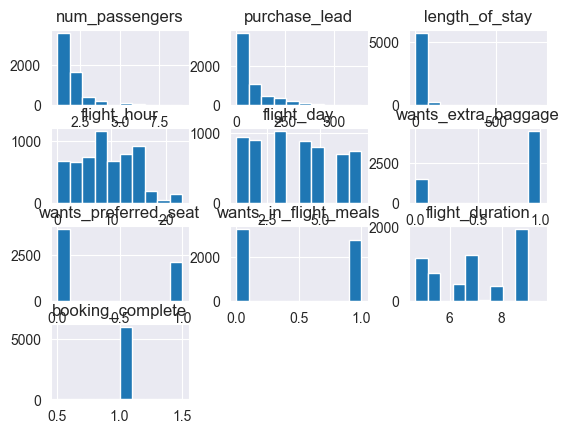

In [17]:
train_data.hist()

In [18]:
#train_data.corr()
#train_data.info()
train_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
6962,2,Mobile,RoundTrip,106,6,14,2,JHBTPE,Malaysia,1,1,1,4.67,1
897,2,Internet,RoundTrip,3,23,3,2,COKSYD,India,1,1,1,8.58,1
325,2,Internet,RoundTrip,182,41,0,5,AKLKUL,New Zealand,1,0,0,8.83,1
4732,1,Mobile,RoundTrip,62,5,4,5,CGKKIX,Indonesia,1,1,0,7.00,1
1069,1,Internet,RoundTrip,297,17,23,5,DPSHND,Japan,1,0,0,7.57,1


<Axes: >

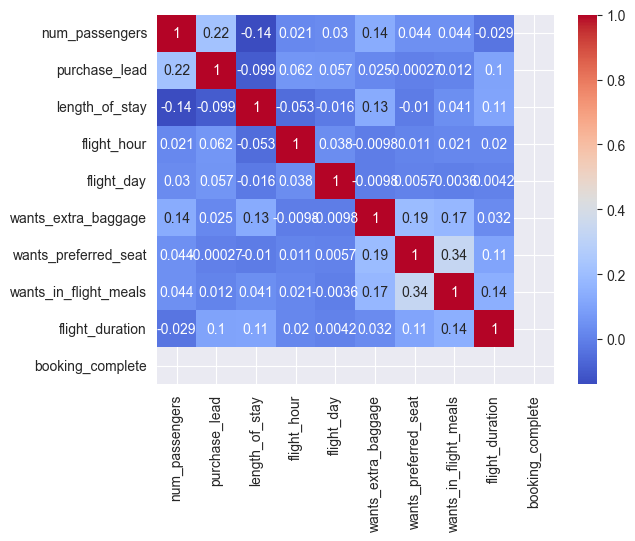

In [19]:
sns.heatmap(sqldf("SELECT num_passengers, purchase_lead, length_of_stay, flight_hour, flight_day, wants_extra_baggage,wants_preferred_seat, wants_in_flight_meals, flight_duration, booking_complete FROM train_data").corr(),annot=True,cmap="coolwarm")

In [20]:
train_data.trip_type.value_counts()

trip_type
RoundTrip     5963
OneWay          14
CircleTrip       5
Name: count, dtype: int64

In [21]:
train_data=train_data.join(pd.get_dummies(train_data.sales_channel))
train_data=train_data.join(pd.get_dummies(train_data.trip_type))
train_data=train_data.join(pd.get_dummies(train_data.route))
train_data=train_data.join(pd.get_dummies(train_data.booking_origin))

In [22]:
train_data.drop(["sales_channel"], axis=1, inplace=True)
train_data.drop(["trip_type"], axis=1, inplace=True)
train_data.drop(["route"], axis=1, inplace=True)
train_data.drop(["booking_origin"], axis=1, inplace=True)

In [23]:
train_data

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,United Arab Emirates,United Kingdom,United States,Vietnam
6962,2,106,6,14,2,1,1,1,4.67,1,...,False,False,False,False,False,False,False,False,False,False
897,2,3,23,3,2,1,1,1,8.58,1,...,False,False,False,False,False,False,False,False,False,False
325,2,182,41,0,5,1,0,0,8.83,1,...,False,False,False,False,False,False,False,False,False,False
4732,1,62,5,4,5,1,1,0,7.00,1,...,False,False,False,False,False,False,False,False,False,False
1069,1,297,17,23,5,1,0,0,7.57,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,2,21,6,3,3,1,1,1,6.62,1,...,False,False,False,False,False,False,False,False,False,False
4712,2,395,5,8,1,1,0,1,6.62,1,...,False,False,False,False,False,False,False,False,False,False
1420,1,1,75,4,4,1,1,0,6.62,1,...,False,False,False,False,False,False,False,False,False,False
6738,1,14,6,12,4,1,1,1,7.57,1,...,False,False,False,False,False,False,False,False,False,False


In [25]:
#sns.heatmap(train_data.corr(),annot=True,cmap="coolwarm")
train_data.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,United Arab Emirates,United Kingdom,United States,Vietnam
num_passengers,1.000000,0.216932,-0.139156,0.021061,0.030428,0.135735,0.043919,0.044101,-0.029210,NaN,...,-0.007869,-0.007869,-0.017602,-0.006680,-0.039772,0.055254,-0.006680,-0.001380,-0.018275,-0.044734
purchase_lead,0.216932,1.000000,-0.098989,0.061999,0.057397,0.025238,-0.000275,0.012126,0.104785,NaN,...,-0.003583,0.003390,-0.021790,0.016021,-0.066258,0.082839,-0.010987,-0.011404,0.000422,-0.029976
length_of_stay,-0.139156,-0.098989,1.000000,-0.052604,-0.016269,0.131026,-0.010269,0.040722,0.105936,NaN,...,0.006173,-0.005173,0.006364,0.034062,-0.044219,-0.058536,-0.002191,-0.012103,-0.008260,0.036669
flight_hour,0.021061,0.061999,-0.052604,1.000000,0.038229,-0.009814,0.010816,0.020600,0.019738,NaN,...,0.022138,0.014644,0.037226,0.002289,0.046543,0.022677,0.026811,0.035514,0.001411,0.008452
flight_day,0.030428,0.057397,-0.016269,0.038229,1.000000,-0.009763,0.005698,-0.003596,0.004247,NaN,...,-0.011840,-0.018415,-0.029426,-0.009122,-0.003066,0.000851,-0.020512,-0.002986,0.004441,-0.027761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thailand,0.055254,0.082839,-0.058536,0.022677,0.000851,0.037116,0.020794,-0.046060,0.089062,NaN,...,-0.003387,-0.003387,-0.007575,-0.005867,-0.046131,1.000000,-0.005867,-0.013563,-0.028084,-0.031631
United Arab Emirates,-0.006680,-0.010987,-0.002191,0.026811,-0.020512,-0.021201,0.030178,-0.005695,0.025959,NaN,...,-0.000290,-0.000290,-0.000648,-0.000502,-0.003945,-0.005867,1.000000,-0.001160,-0.002402,-0.002705
United Kingdom,-0.001380,-0.011404,-0.012103,0.035514,-0.002986,0.000527,0.002139,-0.002343,0.018575,NaN,...,-0.000670,-0.000670,-0.001498,-0.001160,-0.009121,-0.013563,-0.001160,1.000000,-0.005553,-0.006254
United States,-0.018275,0.000422,-0.008260,0.001411,0.004441,-0.002530,0.012666,-0.000896,-0.018779,NaN,...,-0.001387,-0.001387,-0.003101,-0.002402,-0.018887,-0.028084,-0.002402,-0.005553,1.000000,-0.012950


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
x_train=train_data.drop(["booking_complete"], axis=1)
y_train=train_data["booking_complete"]
reg=LinearRegression()
reg.fit(x_train, y_train)